## Final Project Submission

Please fill out:
* Student name: Kai Graham
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
# Predict housing prices to be used by PE shop looking to make purchases.

In [2]:
# import necessary libraries

import pandas as pd
import pandas.util.testing as tm #remove errors
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/kai_graham/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.


In [3]:
# import dataset

data = pd.read_csv('kc_house_data.csv')

In [4]:
# look at dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# look at price to get a sense of what we want to predict and its distribution, etc.
data['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

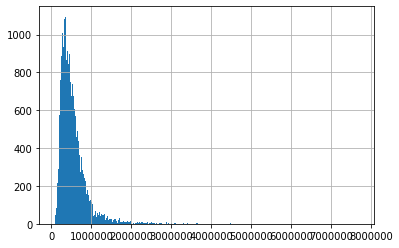

In [6]:
data['price'].hist(bins='auto')

75% of houses in the dataset are 645K or less. As an investor, looking to value houses for entry in the market, will be more focused on houses less than $1M (will go farther and allow money to go to work more)

In [7]:
# remove all houses with prices greater than $1M
houses_data = data.loc[data['price'] <= 1000000]

In [8]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20139 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20139 non-null  int64  
 1   date           20139 non-null  object 
 2   price          20139 non-null  float64
 3   bedrooms       20139 non-null  int64  
 4   bathrooms      20139 non-null  float64
 5   sqft_living    20139 non-null  int64  
 6   sqft_lot       20139 non-null  int64  
 7   floors         20139 non-null  float64
 8   waterfront     17912 non-null  float64
 9   view           20082 non-null  float64
 10  condition      20139 non-null  int64  
 11  grade          20139 non-null  int64  
 12  sqft_above     20139 non-null  int64  
 13  sqft_basement  20139 non-null  object 
 14  yr_built       20139 non-null  int64  
 15  yr_renovated   16562 non-null  float64
 16  zipcode        20139 non-null  int64  
 17  lat            20139 non-null  float64
 18  long  

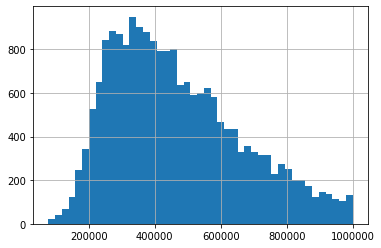

In [9]:
# look at the histogram
houses_data['price'].hist(bins='auto')

In [10]:
houses_data['price'].describe()

count      20139.000000
mean      467970.857441
std       196495.025672
min        78000.000000
25%       314700.000000
50%       435000.000000
75%       594000.000000
max      1000000.000000
Name: price, dtype: float64

The median house price is still relatively inline with where it was before removing the upper set of houses

In [11]:
houses_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
# remove ID column as it is not relevant
houses_data = houses_data.drop(columns='id')

In [13]:
houses_data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [14]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20139 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20139 non-null  object 
 1   price          20139 non-null  float64
 2   bedrooms       20139 non-null  int64  
 3   bathrooms      20139 non-null  float64
 4   sqft_living    20139 non-null  int64  
 5   sqft_lot       20139 non-null  int64  
 6   floors         20139 non-null  float64
 7   waterfront     17912 non-null  float64
 8   view           20082 non-null  float64
 9   condition      20139 non-null  int64  
 10  grade          20139 non-null  int64  
 11  sqft_above     20139 non-null  int64  
 12  sqft_basement  20139 non-null  object 
 13  yr_built       20139 non-null  int64  
 14  yr_renovated   16562 non-null  float64
 15  zipcode        20139 non-null  int64  
 16  lat            20139 non-null  float64
 17  long           20139 non-null  float64
 18  sqft_l

In [15]:
# handle missing values - - waterfront, yr_renovated are the only columns missing values
houses_data['waterfront'].nunique()

2

In [16]:
houses_data['waterfront'].unique()

array([nan,  0.,  1.])

In [17]:
# check how many are missing
houses_data['waterfront'].isna().sum()

2227

In [18]:
# 11% of the data is NaN, don't want to drop this many rows - - set all NaNs as 0

In [19]:
# assuming that NaNs in the waterfront column are related to houses that do not have waterfront
# will relabel all NaNs as 0
houses_data['waterfront'] = houses_data['waterfront'].fillna(value=0.)

In [20]:
# check there are no more missing values
houses_data['waterfront'].isna().any()

False

In [21]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20139 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20139 non-null  object 
 1   price          20139 non-null  float64
 2   bedrooms       20139 non-null  int64  
 3   bathrooms      20139 non-null  float64
 4   sqft_living    20139 non-null  int64  
 5   sqft_lot       20139 non-null  int64  
 6   floors         20139 non-null  float64
 7   waterfront     20139 non-null  float64
 8   view           20082 non-null  float64
 9   condition      20139 non-null  int64  
 10  grade          20139 non-null  int64  
 11  sqft_above     20139 non-null  int64  
 12  sqft_basement  20139 non-null  object 
 13  yr_built       20139 non-null  int64  
 14  yr_renovated   16562 non-null  float64
 15  zipcode        20139 non-null  int64  
 16  lat            20139 non-null  float64
 17  long           20139 non-null  float64
 18  sqft_l

In [22]:
# look at yr_renovated
houses_data['yr_renovated'].nunique()

70

In [23]:
houses_data['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2013., 1994., 1978., 2005., 2003.,
       1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988., 1977.,
       1981., 1995., 2000., 1999., 1970., 1989., 2004., 1986., 2007.,
       1987., 1985., 2001., 1980., 1992., 1971., 1979., 1997., 2010.,
       1950., 1969., 1948., 2009., 2006., 2015., 1974., 2008., 2012.,
       1968., 1963., 1951., 1962., 1953., 1993., 1998., 1996., 1955.,
       1982., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1956., 1967., 1965., 1934., 1972., 1944., 1958.])

In [24]:
# fill NaNs with 0.
houses_data['yr_renovated'] = houses_data['yr_renovated'].fillna(value=0.)

In [25]:
# should be no more missing values
houses_data.isna().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [26]:
# view is missing some values - - how many are missing?
houses_data['view'].isna().sum()

57

In [27]:
# only 57 are missing - - remove all entries without view
houses_data['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [28]:
houses_data = houses_data.dropna()

In [29]:
houses_data.isna().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [30]:
# no more missing values - - check for duplicates
houses_data.duplicated().any()

False

In [31]:
# no duplicates

In [32]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20082 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20082 non-null  object 
 1   price          20082 non-null  float64
 2   bedrooms       20082 non-null  int64  
 3   bathrooms      20082 non-null  float64
 4   sqft_living    20082 non-null  int64  
 5   sqft_lot       20082 non-null  int64  
 6   floors         20082 non-null  float64
 7   waterfront     20082 non-null  float64
 8   view           20082 non-null  float64
 9   condition      20082 non-null  int64  
 10  grade          20082 non-null  int64  
 11  sqft_above     20082 non-null  int64  
 12  sqft_basement  20082 non-null  object 
 13  yr_built       20082 non-null  int64  
 14  yr_renovated   20082 non-null  float64
 15  zipcode        20082 non-null  int64  
 16  lat            20082 non-null  float64
 17  long           20082 non-null  float64
 18  sqft_l

In [33]:
# handle strings - - convert to appropriate types
houses_data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '?', '730.0', '1700.0', '300.0', '970.0',
       '760.0', '700.0', '820.0', '780.0', '790.0', '330.0', '1620.0',
       '360.0', '1510.0', '410.0', '990.0', '600.0', '560.0', '550.0',
       '1000.0', '500.0', '1040.0', '880.0', '1010.0', '240.0', '265.0',
       '290.0', '800.0', '540.0', '840.0', '380.0', '480.0', '570.0',
       '1490.0', '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0',
       '1130.0', '450.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '390.0', '430.0', '210.0',
       '440.0', '220.0', '1160.0', '860.0', '580.0', '2060.0', '1180.0',
       '200.0', '1150.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0',
       '960.0', '870.0', '280.0', '1200.0', '1100.0', '460.0', '770.0',
       '1400.0', '720.0', '660.0', '1220.0', '900.0', '420.0', '1580.0',
       '1380.0', '475.0', '690.0', '270.0', '350.0', '1370.0', '850.0',
       '1470.0', '160.0', '950.0', '50.0', '740.0', '710.0

In [34]:
# need to remove the entries with ?
# check how many there are
houses_data.loc[houses_data['sqft_basement'] == '?'].count()

date             422
price            422
bedrooms         422
bathrooms        422
sqft_living      422
sqft_lot         422
floors           422
waterfront       422
view             422
condition        422
grade            422
sqft_above       422
sqft_basement    422
yr_built         422
yr_renovated     422
zipcode          422
lat              422
long             422
sqft_living15    422
sqft_lot15       422
dtype: int64

In [35]:
# only 422 entries out of 20,000 - - remove these
houses_data = houses_data.loc[houses_data['sqft_basement'] != '?']

In [36]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19660 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19660 non-null  object 
 1   price          19660 non-null  float64
 2   bedrooms       19660 non-null  int64  
 3   bathrooms      19660 non-null  float64
 4   sqft_living    19660 non-null  int64  
 5   sqft_lot       19660 non-null  int64  
 6   floors         19660 non-null  float64
 7   waterfront     19660 non-null  float64
 8   view           19660 non-null  float64
 9   condition      19660 non-null  int64  
 10  grade          19660 non-null  int64  
 11  sqft_above     19660 non-null  int64  
 12  sqft_basement  19660 non-null  object 
 13  yr_built       19660 non-null  int64  
 14  yr_renovated   19660 non-null  float64
 15  zipcode        19660 non-null  int64  
 16  lat            19660 non-null  float64
 17  long           19660 non-null  float64
 18  sqft_l

In [37]:
# now need to convert basement column to a number format
houses_data['sqft_basement'] = houses_data['sqft_basement'].astype('float64')

In [38]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19660 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19660 non-null  object 
 1   price          19660 non-null  float64
 2   bedrooms       19660 non-null  int64  
 3   bathrooms      19660 non-null  float64
 4   sqft_living    19660 non-null  int64  
 5   sqft_lot       19660 non-null  int64  
 6   floors         19660 non-null  float64
 7   waterfront     19660 non-null  float64
 8   view           19660 non-null  float64
 9   condition      19660 non-null  int64  
 10  grade          19660 non-null  int64  
 11  sqft_above     19660 non-null  int64  
 12  sqft_basement  19660 non-null  float64
 13  yr_built       19660 non-null  int64  
 14  yr_renovated   19660 non-null  float64
 15  zipcode        19660 non-null  int64  
 16  lat            19660 non-null  float64
 17  long           19660 non-null  float64
 18  sqft_l

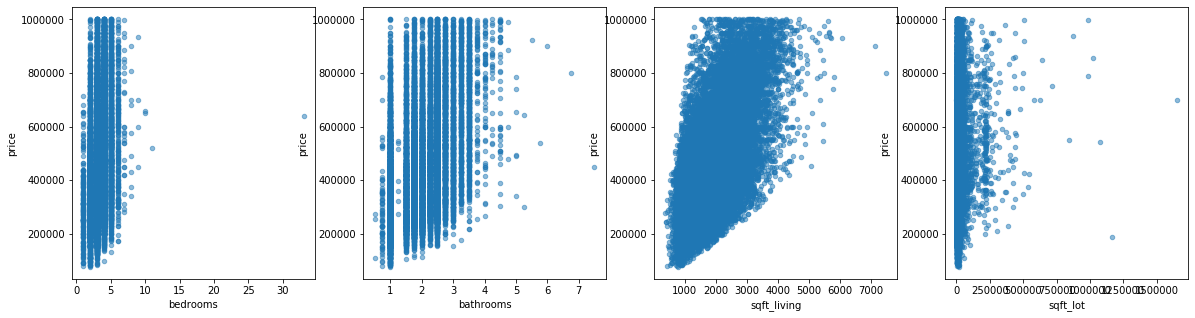

In [39]:
# now the only string column we have is the date column
# begin visualizations and plotting against price to see which may be solid predictors to begin with and 
# which may need log normalization, etc.
# will need to normalize / scale
# will need to split cat and continuous variables

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], axes):
    houses_data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.5)

In [40]:
# only two houses that are greater than 10 bedrooms so remove these
houses_data = houses_data.loc[houses_data['bedrooms'] <= 10]

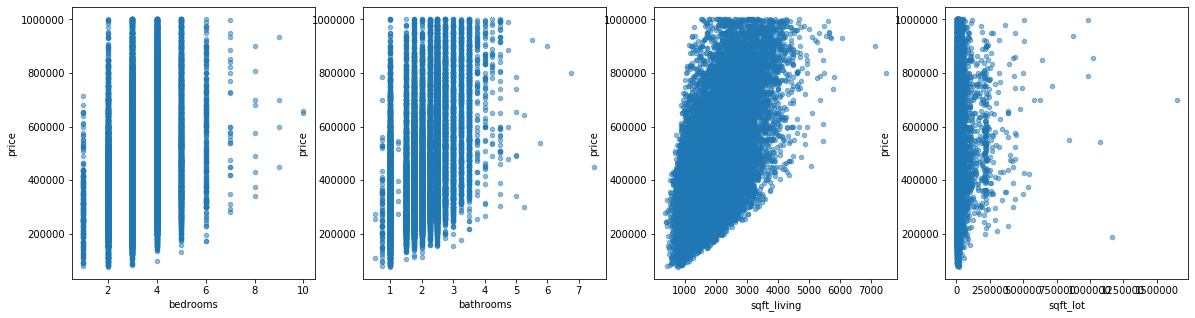

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], axes):
    houses_data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.5)

plt.show()

In [42]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19658 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19658 non-null  object 
 1   price          19658 non-null  float64
 2   bedrooms       19658 non-null  int64  
 3   bathrooms      19658 non-null  float64
 4   sqft_living    19658 non-null  int64  
 5   sqft_lot       19658 non-null  int64  
 6   floors         19658 non-null  float64
 7   waterfront     19658 non-null  float64
 8   view           19658 non-null  float64
 9   condition      19658 non-null  int64  
 10  grade          19658 non-null  int64  
 11  sqft_above     19658 non-null  int64  
 12  sqft_basement  19658 non-null  float64
 13  yr_built       19658 non-null  int64  
 14  yr_renovated   19658 non-null  float64
 15  zipcode        19658 non-null  int64  
 16  lat            19658 non-null  float64
 17  long           19658 non-null  float64
 18  sqft_l

In [43]:
"""
Function to plot y vs. a chosen set of x variables
"""

def plot_x_y(x_vals, y_val):
    fig, axes = plt.subplots(nrows = 1, ncols=len(x_vals), figsize=(20,5))
    for xcol, ax in zip(x_vals, axes):
        houses_data.plot(kind='scatter', x=xcol, y=y_val, ax=ax, alpha=0.5)
    plt.tight_layout()
    plt.show()

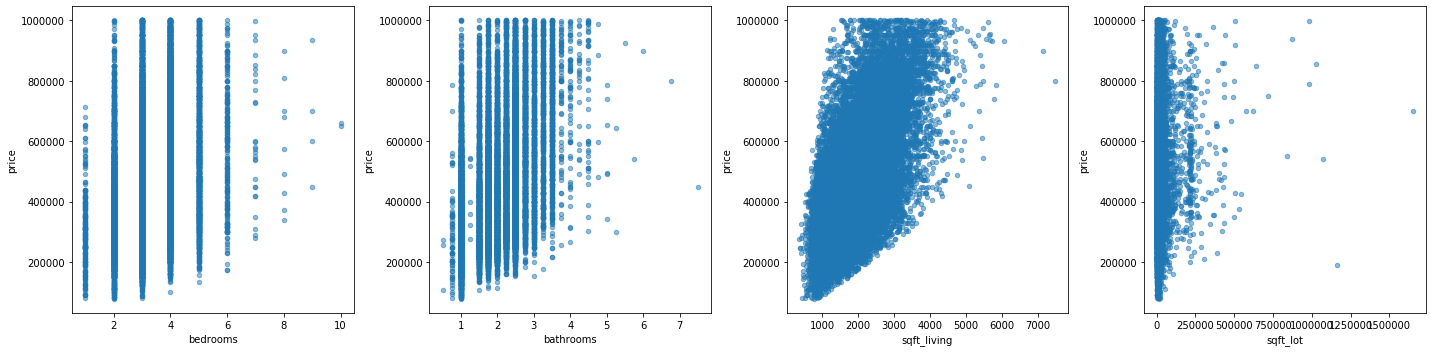

In [44]:
plot_x_y(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], 'price')

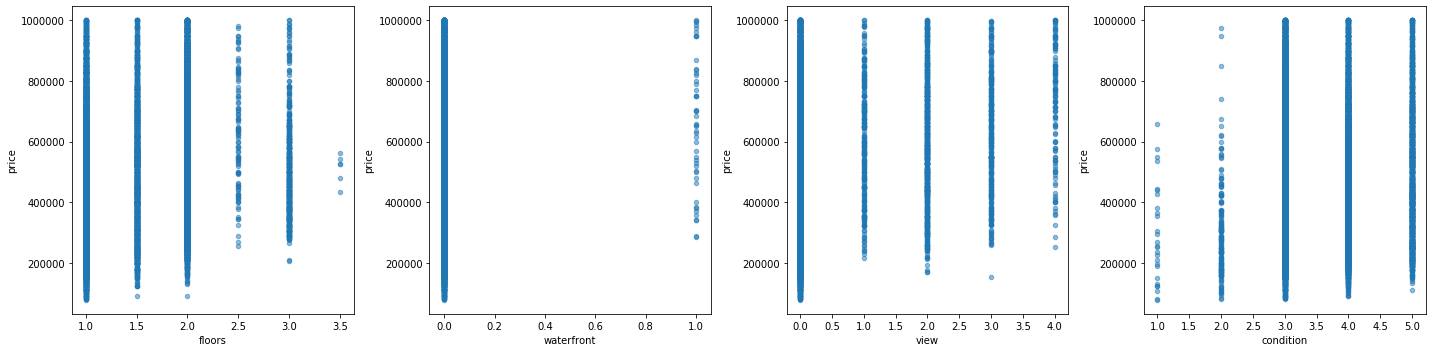

In [45]:
plot_x_y(['floors', 'waterfront', 'view', 'condition'], 'price')

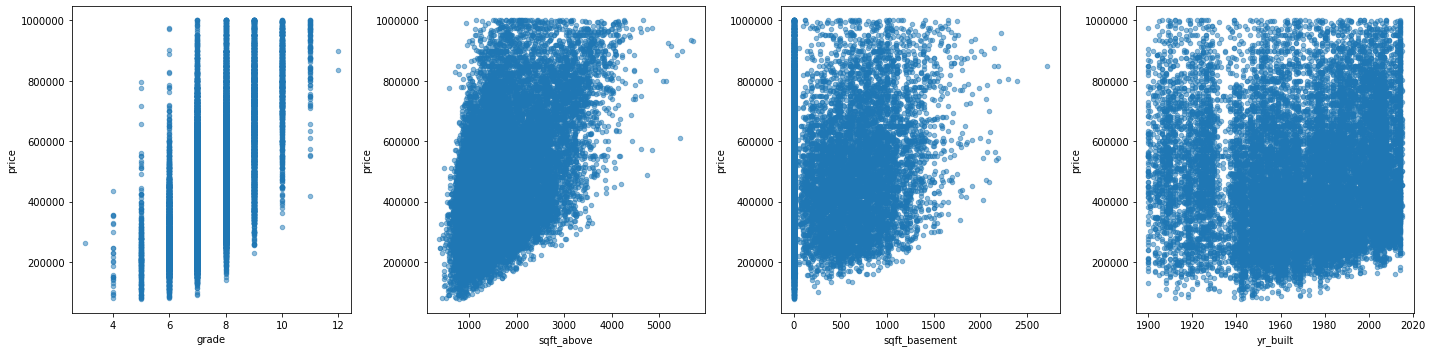

In [46]:
plot_x_y(['grade', 'sqft_above', 'sqft_basement', 'yr_built'], 'price')

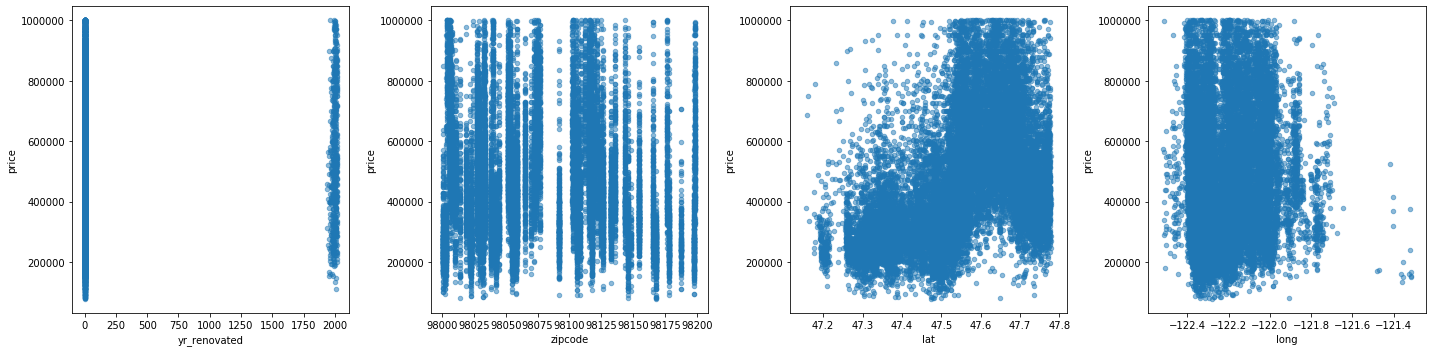

In [47]:
plot_x_y(['yr_renovated', 'zipcode', 'lat', 'long'], 'price')

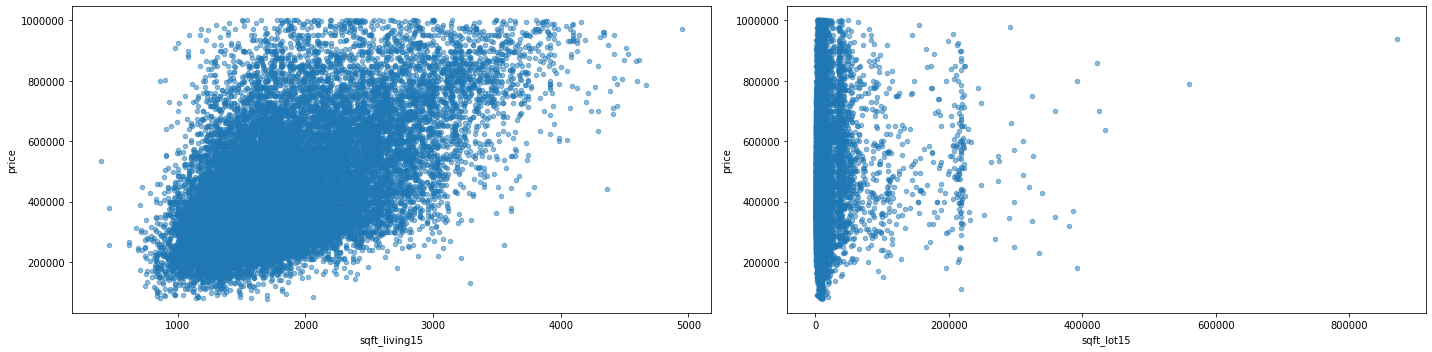

In [48]:
plot_x_y(['sqft_living15', 'sqft_lot15'], 'price')

In [49]:
# there are a number of outliers - - try to clean some of this up
# check how many entries have a sqft lot greater than 500K
houses_data['sqft_lot'].describe()

count    1.965800e+04
mean     1.451796e+04
std      4.012317e+04
min      5.200000e+02
25%      5.000000e+03
50%      7.500000e+03
75%      1.026000e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [50]:
houses_data.loc[houses_data['sqft_lot'] >= 500000].count()

date             18
price            18
bedrooms         18
bathrooms        18
sqft_living      18
sqft_lot         18
floors           18
waterfront       18
view             18
condition        18
grade            18
sqft_above       18
sqft_basement    18
yr_built         18
yr_renovated     18
zipcode          18
lat              18
long             18
sqft_living15    18
sqft_lot15       18
dtype: int64

In [51]:
# only 18 entries - - let's remove these and see if this helps
houses_data = houses_data.loc[houses_data['sqft_lot'] < 500000]

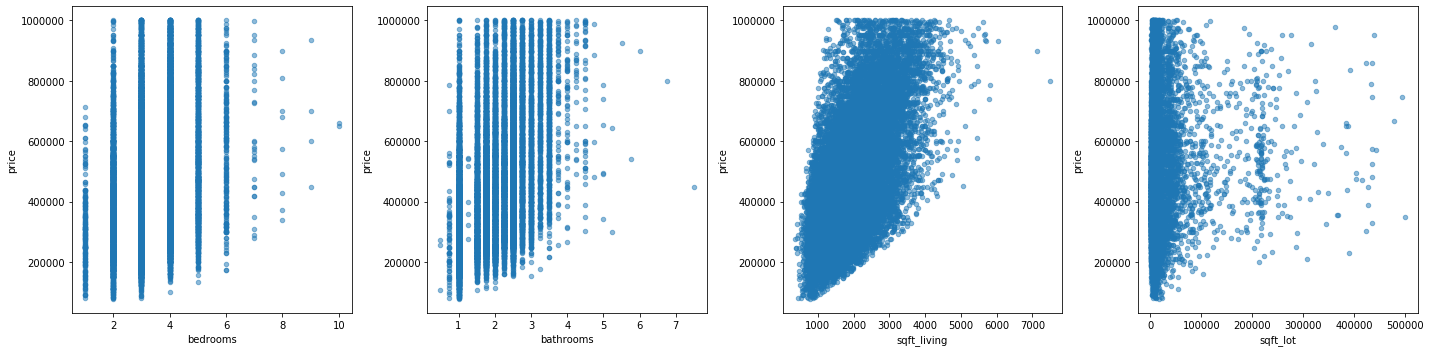

In [52]:
# look at visualizations one more time
plot_x_y(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], 'price')

In [53]:
# clear continuouse variables from these plots appear to be sqft_living, sqft_lot, sqft_above, sqft_basement,
# lat, and long - - it also seems like there may be some polynomial relationship between lat and price
cont_variables = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long']

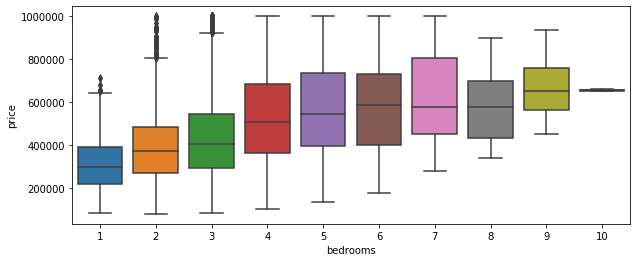

In [54]:
# evaluate other columns for ordinal relationships - if ordinal, will treat as a single column, otherwise 
# create dummy vars
plt.figure(figsize=(10, 4))
ax = sns.boxplot(x='bedrooms', y='price', data=houses_data)

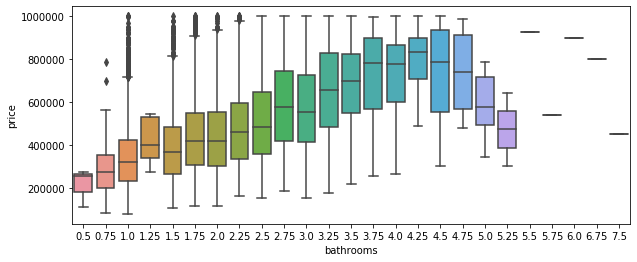

In [55]:
plt.figure(figsize=(10, 4))
ax = sns.boxplot(x='bathrooms', y='price', data=houses_data)
plt.show()

In [56]:
# how many houses have more than 5 bathrooms
houses_data.loc[houses_data['bathrooms'] > 5].count()

date             7
price            7
bedrooms         7
bathrooms        7
sqft_living      7
sqft_lot         7
floors           7
waterfront       7
view             7
condition        7
grade            7
sqft_above       7
sqft_basement    7
yr_built         7
yr_renovated     7
zipcode          7
lat              7
long             7
sqft_living15    7
sqft_lot15       7
dtype: int64

In [57]:
# only 7 --  remove these entries
houses_data = houses_data.loc[houses_data['bathrooms'] <= 5]

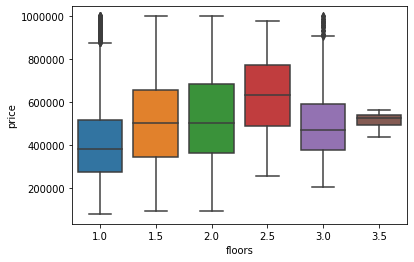

In [58]:
ax = sns.boxplot(x='floors', y='price', data=houses_data)

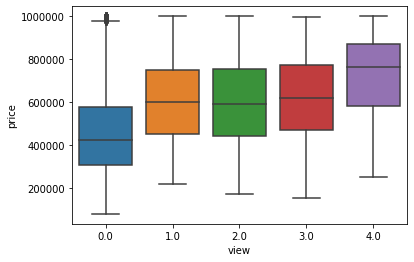

In [59]:
ax = sns.boxplot(x='view', y='price', data=houses_data)

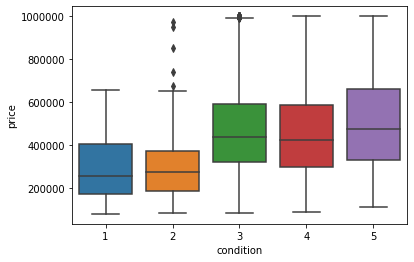

In [60]:
ax = sns.boxplot(x='condition', y='price', data=houses_data)

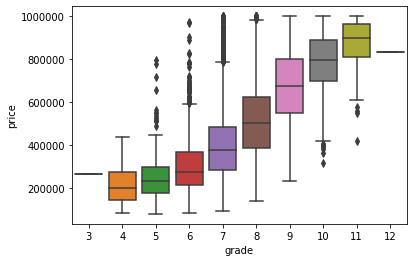

In [61]:
ax = sns.boxplot(x='grade', y='price', data=houses_data)

In [62]:
# how many have a grade of 12?
houses_data.loc[houses_data['grade'] >= 12].count()

date             1
price            1
bedrooms         1
bathrooms        1
sqft_living      1
sqft_lot         1
floors           1
waterfront       1
view             1
condition        1
grade            1
sqft_above       1
sqft_basement    1
yr_built         1
yr_renovated     1
zipcode          1
lat              1
long             1
sqft_living15    1
sqft_lot15       1
dtype: int64

In [63]:
# only 1 entry --  remove this
houses_data = houses_data.loc[houses_data['grade'] < 12]

In [64]:
# create dummies and scale / normalize where needed

In [65]:
houses_data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [66]:
# categorical columns prior to any preprocessing
cat_origin = houses_data[['bathrooms', 'floors', 'condition', 'waterfront', 'view']]

In [67]:
cat_origin.head()

,bathrooms,floors,condition,waterfront,view
0,1.00,1.0,3,0.0,0.0
1,2.25,2.0,3,0.0,0.0
2,1.00,1.0,3,0.0,0.0
3,3.00,1.0,5,0.0,0.0
4,2.00,1.0,3,0.0,0.0


In [68]:
bath_dummies = pd.get_dummies(cat_origin['bathrooms'], prefix='bath', drop_first=True)
floor_dummies = pd.get_dummies(cat_origin['floors'], prefix='floor', drop_first=True)
cond_dummies = pd.get_dummies(cat_origin['condition'], prefix='cond', drop_first=True)
water_dummies = pd.get_dummies(cat_origin['waterfront'], prefix='water', drop_first=True)
view_dummies = pd.get_dummies(cat_origin['view'], prefix='view', drop_first=True)

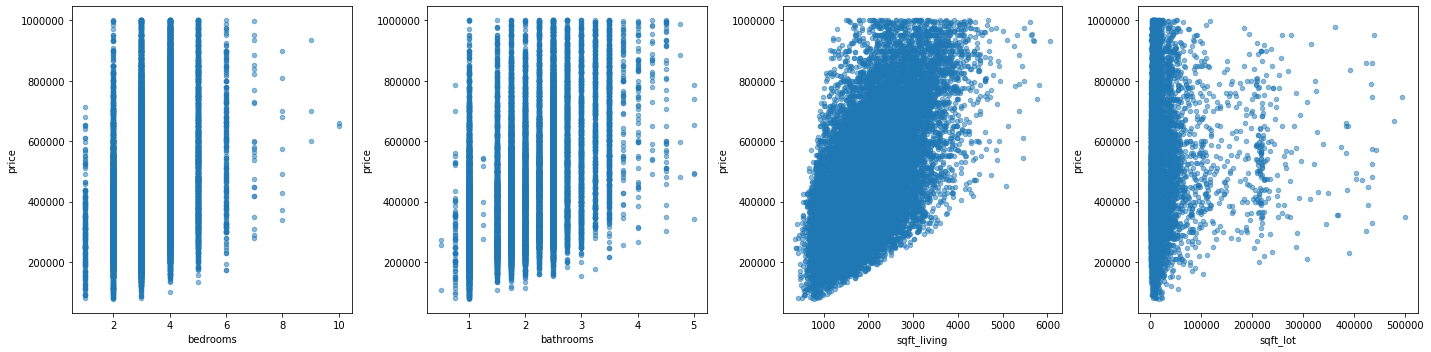

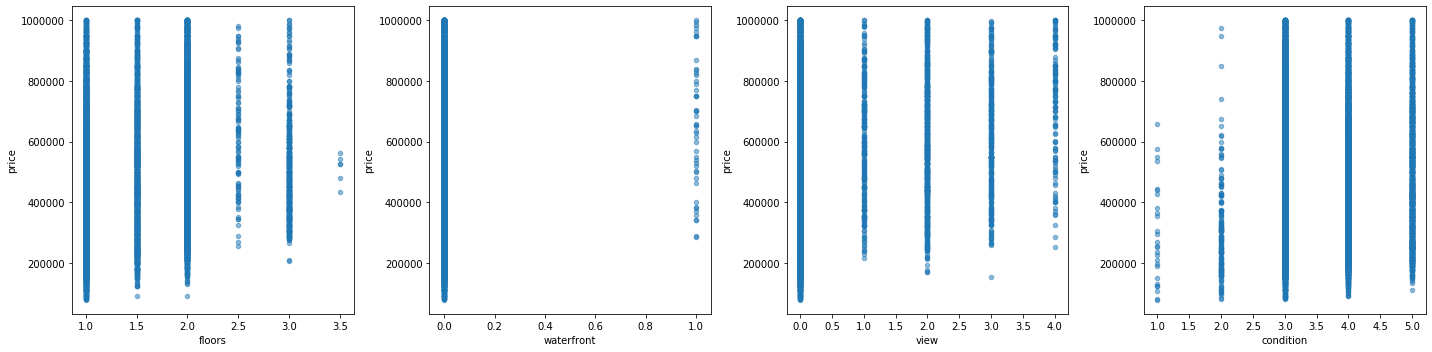

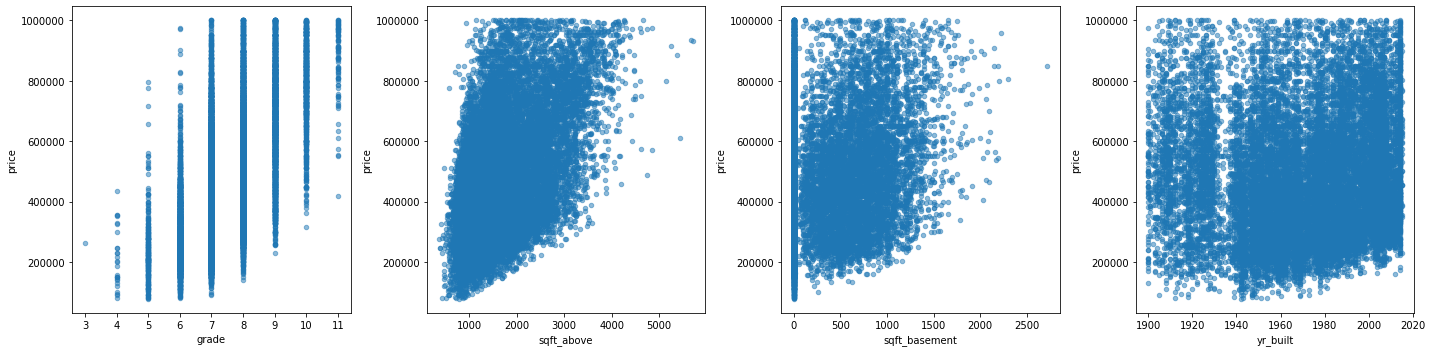

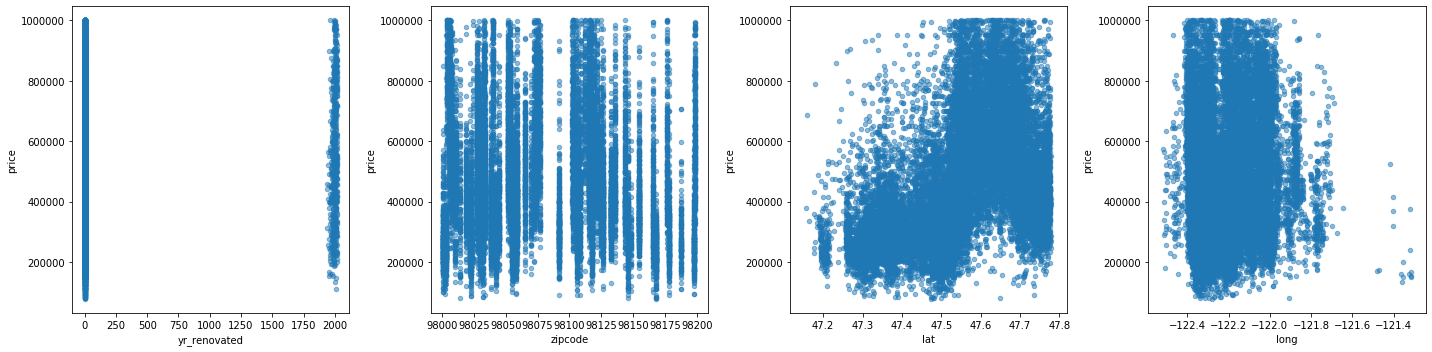

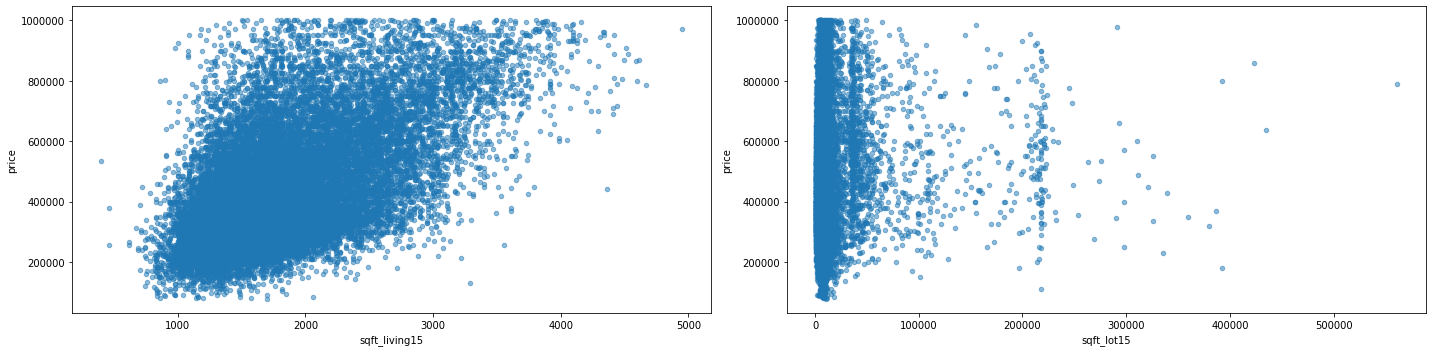

In [69]:
# evaluate variables that do not meet linearity requirement
plot_x_y(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], 'price')
plot_x_y(['floors', 'waterfront', 'view', 'condition'], 'price')
plot_x_y(['grade', 'sqft_above', 'sqft_basement', 'yr_built'], 'price')
plot_x_y(['yr_renovated', 'zipcode', 'lat', 'long'], 'price')
plot_x_y(['sqft_living15', 'sqft_lot15'], 'price')

In [70]:
# columns that meet linearity requirement
linearity_req = ['sqft_living15', 'sqft_basement', 'sqft_above', 'sqft_living']

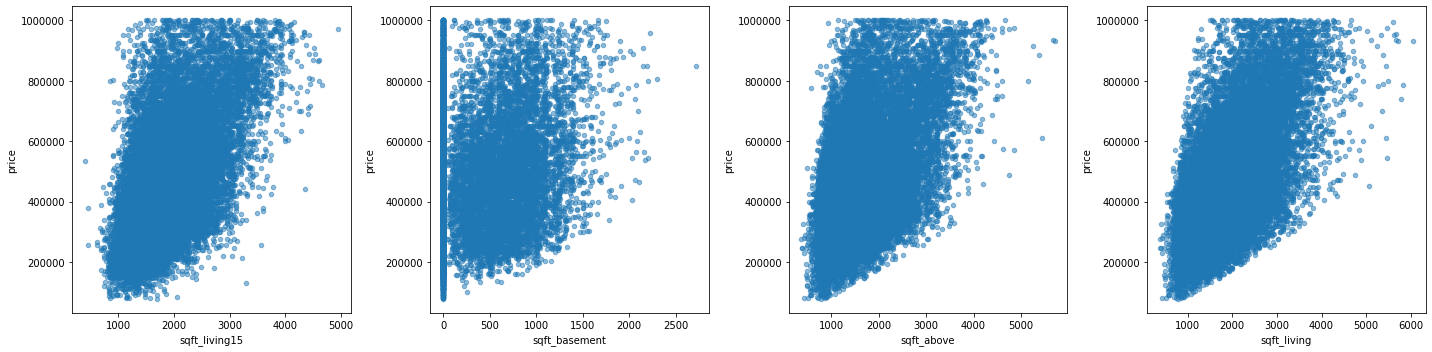

In [71]:
# plot all linear columns against price
plot_x_y(['sqft_living15', 'sqft_basement', 'sqft_above', 'sqft_living'], 'price')

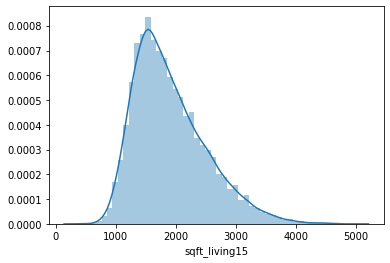

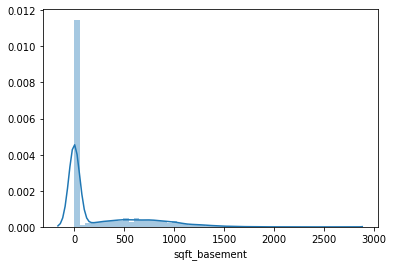

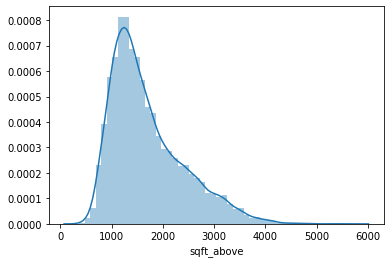

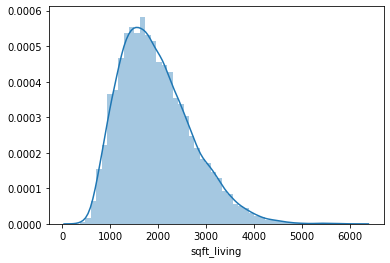

In [72]:
# evaluate the distributions of each to see if we need to log transform
# scales appear to be in line with each other -- and all are in square feet so no normalization will be required
for x_col in linearity_req:
    sns.distplot(houses_data[x_col]);
    plt.show()

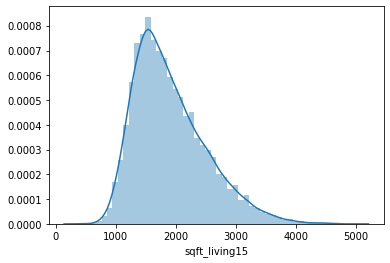

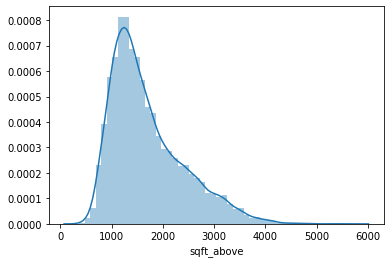

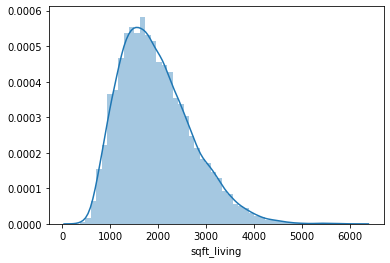

In [73]:
# given 0 values for basement - - will ignore this variable for the time being
linearity_req = ['sqft_living15', 'sqft_above', 'sqft_living']
for x_col in linearity_req:
    sns.distplot(houses_data[x_col]);
    plt.show()

In [74]:
# all have right skew and would likely benefit from log transformation - - log transform all three


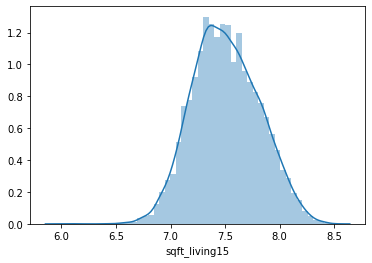

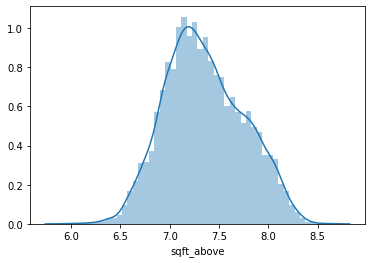

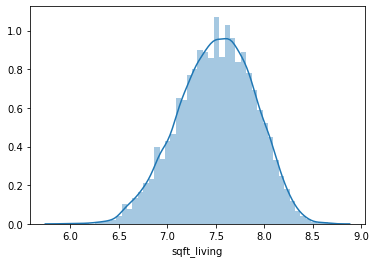

In [75]:
for x_col in linearity_req:
    houses_data[x_col] = houses_data[x_col].map(lambda x: np.log(x))
    
    
# plot again
for x_col in linearity_req:
    sns.distplot(houses_data[x_col]);
    plt.show()

In [76]:
# distributions are looking much more normal now

In [77]:
preprocessed = houses_data[['sqft_living15', 'sqft_above', 'sqft_living', 'price']]
preprocessed.head()

,sqft_living15,sqft_above,sqft_living,price
0,7.200425,7.073270,7.073270,221900.0
1,7.432484,7.682482,7.851661,538000.0
2,7.908387,6.646391,6.646391,180000.0
3,7.215240,6.956545,7.580700,604000.0
4,7.495542,7.426549,7.426549,510000.0


In [78]:
preprocessed = pd.concat([preprocessed, bath_dummies, floor_dummies, cond_dummies, water_dummies, view_dummies],
                         axis=1)

In [79]:
preprocessed.head()

,sqft_living15,sqft_above,sqft_living,price,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,...,floor_3.5,cond_2,cond_3,cond_4,cond_5,water_1.0,view_1.0,view_2.0,view_3.0,view_4.0
0,7.200425,7.073270,7.073270,221900.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,7.432484,7.682482,7.851661,538000.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,7.908387,6.646391,6.646391,180000.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,7.215240,6.956545,7.580700,604000.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,7.495542,7.426549,7.426549,510000.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


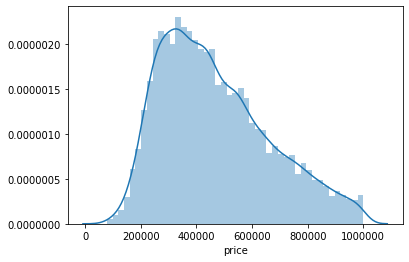

In [80]:
#evaluate distribution of price
sns.distplot(preprocessed['price'])

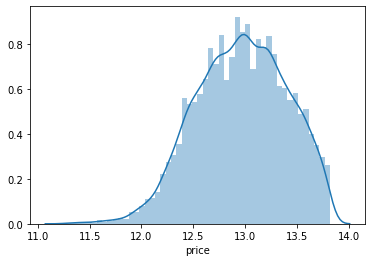

In [81]:
#price would also benefit from a log transformation
# log transform price

preprocessed['price'] = preprocessed['price'].map(lambda x: np.log(x))
sns.distplot(preprocessed['price'])

In [82]:
# looking more normal - - will keep this


In [83]:
# create test / train split to start building out regression model
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [84]:
# separate out X and y
X = preprocessed.drop('price', axis=1)
y = preprocessed['price']

In [85]:
# create test and train split (using 20%) and set random seed for reproducibility
np.random.seed(23)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [86]:
# fit linear model and apply model to make predictions on the test set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [87]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
y_hat_test = linreg.predict(X_test)

In [89]:
# calculate residuals and mean squared error on the test set
from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test

In [90]:
test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

0.10913710772954817

In [91]:
# cross validation
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)

In [92]:
cv_5_results.mean()

0.10906209668824088

In [93]:
# run OLS to check the p-values, and statistical significance of 
# different variables

In [115]:
import statsmodels.api as sm
predictors_int = sm.add_constant(X)
model = sm.OLS(preprocessed['price'], predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     416.7
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:48:22   Log-Likelihood:                -6026.5
No. Observations:               19632   AIC:                         1.213e+04
Df Residuals:                   19596   BIC:                         1.241e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.4477      0.214     30.064      0.000       6.027       6.868
sqft_living15     0.4004      0.012     34.101      0.000       0.377       0.423
sqft_above       -0.1599      0.014    -11.678      0.000      -0.187      -0.133
sqft_living       0.5253      0.015     36.046      0.000       0.497       0.554
bath_0.75         0.3196      0.194      1.646      0.100      -0.061       0.700
bath_1.0          0.3894      0.190      2.047      0.041       0.016       0.762
bath_1.25         0.4630      0.227      2.037      0.042       0.017       0.909
bath_1.5          0.3578      0.190      1.879      0.060      -0.016       0.731
bath_1.75         0.3772      0.190      1.982      0.048       0.004       0.750
bath_2.0          0.3757      0.190      1.973      0.049       0.002       0.749
bath_2.25         0.3530      0.190      1.853      0.064      -0.020       0.726
bath_2.5          0.3239      0.190      1.701      0.089      -0.049       0.697
bath_2.75         0.3848      0.191      2.018      0.044       0.011       0.759
bath_3.0          0.3846      0.191      2.015      0.044       0.010       0.759
bath_3.25         0.4511      0.191      2.359      0.018       0.076       0.826
bath_3.5          0.4446      0.191      2.326      0.020       0.070       0.819
bath_3.75         0.5079      0.195      2.608      0.009       0.126       0.890
bath_4.0          0.4455      0.195      2.281      0.023       0.063       0.828
bath_4.25         0.4889      0.203      2.412      0.016       0.092       0.886
bath_4.5          0.4107      0.197      2.080      0.037       0.024       0.798
bath_4.75         0.3575      0.252      1.419      0.156      -0.136       0.851
bath_5.0          0.2706      0.233      1.160      0.246      -0.187       0.728
floor_1.5         0.1848      0.009     20.824      0.000       0.167       0.202
floor_2.0         0.1049      0.008     13.534      0.000       0.090       0.120
floor_2.5         0.2852      0.033      8.651      0.000       0.221       0.350
floor_3.0         0.3670      0.016     23.173      0.000       0.336       0.398
floor_3.5         0.4458      0.135      3.309      0.001       0.182       0.710
cond_2            0.0907      0.069      1.323      0.186      -0.044       0.225
cond_3            0.2856      0.064      4.488      0.000       0.161       0.410
cond_4            0.3188      0.064      5.004      0.000       0.194       0.444
cond_5            0.4194      0.064      6.536      0.000       0.294       0.545
water_1.0         0.1527      0.055      2.800      0.005       0.046       0.259
view_1.0          0.1602      0.021      7.675      0.000       0.119       0.201
view_2.0          0.1290      0.013     10.273      0.000       0.104       0.154
view_3.0          0.1135      0.019      5.927   

In [116]:
# evaluate multi-collinearity and remove variables that show high multi-collinearity
